In [2]:
%load_ext autoreload
%autoreload 2


In [3]:

import matplotlib.pyplot as plt
import numpy as np 

from compare_f1_f2.results_compare import Facts1Results, Facts2Results, check_ice_sheet_projections

# FACTS module results comparison
Comparing results of individual modules run in FACTS v.1 and FACTS v.2



### Parameters:
Module: `Bamber19` <br>
Scenario `ssp585` <br>
Location: NYC <br>
`nsamps` : 500 <br>
`pyear_start` : 2020 <br>
`pyear_end`: 2150 <br>
`pyear_step`: 10 <br>
`baseyear`: 2000 <br>

---

Each version should produce (at least) the following:
- local AIS projections (.nc)
- local WAIS projections (.nc)
- local EAIS projections (.nc)
- local GIS projections (.nc)
- global AIS projections (.nc)
- global WAIS projections (.nc)
- global EAIS projections (.nc)
- global GIS projections (.nc)


`v.1` also writes versions tagged with 'raw' as well as FAIR temperature outputs. 'Raw' are forced with scenario rcp85 instead of ssp585.

### TODO: Validate rcp85 scenario
- Run v.2 *without* passing a climate data file
- Check against files tagged 'raw' in v.1 output dir
---

## Facts 1

### Module run
This is run by creating & entering a docker container and running a bamber 19 experiement with the specified scenario etc. 
```
docker run -it --volume=$HOME/Desktop/facts_work/facts_v1:/opt/facts --volume=$HOME/Desktop/facts_work/facts_v1/tmp/radical.pilot.sandbox:/home/jovyan/radical.pilot.sandbox -w /opt/facts facts 
(factsVe) jovyan@6a02031ad96e:/opt/facts$ python3 facts/runFACTS.py facts/experiments/bamber19.ssp585/
```

### Results

`Facts1Results` holds paths to all files written during the execution of a FACTS 1 experiment that runs the Bamber module. Create a `Facts1Results` object with the specified experiement (eg. `'bamber19'`) and scenario (eg. `'ssp585'`). This object holds each of the `xr.Datasets` corresponding to projections for each ice sheet and local or global levels as attrs. 

In [4]:
facts1_results = Facts1Results(module='bamber19', 
                                   scenario='ssp585', 
                                   gen_dir='/Users/emmamarshall/Desktop/facts_work/facts_v1/facts',
                                   dir_name='output')

## FACTS 2


### Module run: 

```
uv run bamber19-icesheets --pipeline-id bamber19_ssp585_validation --climate-data-file $HOME/Desktop/facts_work/facts_v1/facts/experiments/bamber19.ssp585/output/bamber19.ssp585.temperature.fair.temperature_climate.nc --scenario 'ssp585' --pyear-start 2020 --pyear-end 2150 --nsamps 500
```

Pass the `temperature_climate.nc` written by the corresponding v.1 run for `--climate-data-file`.
### Results

`Facts2Results` holds paths to all files written during the execution of the `bamber19-icesheets` CLI tool that corresponds to the Bamber19-icesheets module in v.1. Create a `Facts2Results` object by specifying the path to the directory of v.2 results and the pipeline ID corresponding to the desired run. This object holds each of the `xr.Datasets` corresponding to projections for each ice sheet and local or global levels as attrs. 

In [5]:
#Specify where the f2 results are 
f2_bamber_results_dir = '/Users/emmamarshall/Desktop/facts_work/facts_v2/bamber19-icesheets/bamber19-icesheets/data/output'
#And the pipeline id of the run to read 
pipeline_id = 'bamber19_ssp585_validation'

In [6]:
facts2_results = Facts2Results(pipeline_id=pipeline_id, 
                                       results_dir=f2_bamber_results_dir
)

## Compare results

Now, check if global arrays are equal for each ice sheet

In [7]:
ice_sheet_ls = ['AIS','EAIS','WAIS','GIS']
local_global_ls = ['local','global']

In [8]:
for spatial_type in local_global_ls:
    for ice_sheet in ice_sheet_ls:
        check_ice_sheet_projections(facts1_obj=facts1_results, 
                                   facts2_obj=facts2_results, 
                                   icesheet=ice_sheet,
                                   local_global=spatial_type)
    print('---')

The local AIS sea level projections for FACTS v.1 and FACTS v.2 match!
The local EAIS sea level projections for FACTS v.1 and FACTS v.2 match!
The local WAIS sea level projections for FACTS v.1 and FACTS v.2 match!
The local GIS sea level projections for FACTS v.1 and FACTS v.2 match!
---
The global AIS sea level projections for FACTS v.1 and FACTS v.2 match!
The global EAIS sea level projections for FACTS v.1 and FACTS v.2 match!
The global WAIS sea level projections for FACTS v.1 and FACTS v.2 match!
The global GIS sea level projections for FACTS v.1 and FACTS v.2 match!
---


## Closer look

In [9]:
facts1_results.ds_processed_global_AIS['sea_level_change']

<xarray.DataArray 'sea_level_change' (samples: 500, years: 14, locations: 1)> Size: 28kB
array([[[ 10.940027],
        [ 32.230022],
        ...,
        [  6.753428],
        [-11.405497]],

       [[  5.077768],
        [  6.105459],
        ...,
        [138.06209 ],
        [126.52836 ]],

       ...,

       [[  7.964337],
        [ 18.116243],
        ...,
        [341.04626 ],
        [425.97375 ]],

       [[ 15.365209],
        [ 50.949028],
        ...,
        [150.18504 ],
        [217.58719 ]]], shape=(500, 14, 1), dtype=float32)
Coordinates:
  * years      (years) int32 56B 2020 2030 2040 2050 ... 2120 2130 2140 2150
  * samples    (samples) int64 4kB 0 1 2 3 4 5 6 ... 493 494 495 496 497 498 499
  * locations  (locations) int64 8B -1
Attributes:
    units:    mm

In [10]:
facts2_results.ds_global_AIS['sea_level_change']

<xarray.DataArray 'sea_level_change' (samples: 500, years: 14, locations: 1)> Size: 28kB
array([[[ 10.940027],
        [ 32.230022],
        ...,
        [  6.753428],
        [-11.405497]],

       [[  5.077768],
        [  6.105459],
        ...,
        [138.06209 ],
        [126.52836 ]],

       ...,

       [[  7.964337],
        [ 18.116243],
        ...,
        [341.04626 ],
        [425.97375 ]],

       [[ 15.365209],
        [ 50.949028],
        ...,
        [150.18504 ],
        [217.58719 ]]], shape=(500, 14, 1), dtype=float32)
Coordinates:
  * years      (years) int32 56B 2020 2030 2040 2050 ... 2120 2130 2140 2150
  * samples    (samples) int64 4kB 0 1 2 3 4 5 6 ... 493 494 495 496 497 498 499
  * locations  (locations) int64 8B -1
Attributes:
    units:    mm

In [11]:
facts1_results.ds_processed_local_GIS

<xarray.Dataset> Size: 32kB
Dimensions:           (samples: 500, years: 14, locations: 1)
Coordinates:
  * years             (years) int64 112B 2020 2030 2040 2050 ... 2130 2140 2150
  * locations         (locations) int64 8B 12
  * samples           (samples) int64 4kB 0 1 2 3 4 5 ... 495 496 497 498 499
Data variables:
    sea_level_change  (samples, years, locations) float32 28kB 5.373 ... 145.6
    lat               (locations) float64 8B ...
    lon               (locations) float64 8B ...
Attributes:
    description:  Local SLR contributions from icesheets according to Bamber ...
    history:      Created Thu Sep 18 22:25:47 2025
    source:       SLR Framework: Bamber icesheet workflow
    scenario:     temperature-driven
    baseyear:     2000
    source_file:  /Users/emmamarshall/Desktop/facts_work/facts_v1/facts/exper...

In [12]:
facts2_results.ds_local_GIS

<xarray.Dataset> Size: 32kB
Dimensions:           (samples: 500, years: 14, locations: 1)
Coordinates:
  * years             (years) int64 112B 2020 2030 2040 2050 ... 2130 2140 2150
  * locations         (locations) int64 8B 12
  * samples           (samples) int64 4kB 0 1 2 3 4 5 ... 495 496 497 498 499
Data variables:
    sea_level_change  (samples, years, locations) float32 28kB 5.373 ... 145.6
    lat               (locations) float64 8B ...
    lon               (locations) float64 8B ...
Attributes:
    description:  Local SLR contributions from icesheets according to Bamber ...
    history:      Created Thu Sep 18 17:04:40 2025
    source:       SLR Framework: Bamber icesheet workflow
    scenario:     ssp585
    baseyear:     2000
    source_file:  /Users/emmamarshall/Desktop/facts_work/facts_v2/bamber19-ic...

In [10]:
np.array_equal(facts1_results.ds_processed_global_GIS['sea_level_change'].data,
               facts2_results.ds_global_GIS['sea_level_change'].data)

True

In [11]:
np.array_equal(facts1_results.ds_processed_local_AIS['sea_level_change'].data,
               facts2_results.ds_local_AIS['sea_level_change'].data)

True

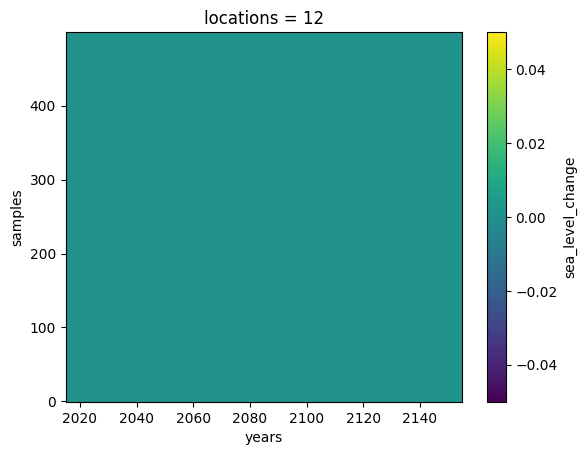

In [12]:
fig, ax = plt.subplots()
(facts2_results.ds_local_AIS['sea_level_change']- facts1_results.ds_processed_local_AIS['sea_level_change']).plot(ax=ax)